# Added Data Dictionary:
- 'start_date_converted' = the original 'start_date' column was in *Excel serial date numbers*; this column is in datetime Y-m-d format


## -----------------------------------------------------------------------------------------------

## Notes:
- 7.5% of schools are completely missing all their 'overall_rating' data, in this EDA notebook
- 1,766 schools present in this dataset (1,901 exist in SchoolLocationData_EDA; 135 difference)
- all together, 268/1,901 schools are either completely missing or are missing key metrics in this analysis (14.1%)

'bn' (building number) = 'building_code', in SchoolLocationData_EDA
* K = Brooklyn
* M = Manhattan
* Q = Queens
* R = Staten Island (Richmond)
* X = The Bronx

'overall_rating' codes: (according to Claude Haiku)
- O = Operationally Sound (the highest rating - school is functioning well)
- P = Proficient (good performance)
- U = Underdeveloped (needs improvement)
- D = Developing (in progress, showing some improvement)
- WD = Well Developed (strong performance)
- DYO = Demonstrates Year-to-Year Improvement (or similar progress indicator)
- UPF = Possibly "Underperforming" or a specific category
- UD = Underdeveloped (or similar, possibly a variant)

'overall_rating' codes: (according to Gemini)
- Rubric Ratings:
- WD = Well Developed (highest rating)
- P = Proficent
- D = Developing
- U = Underdeveloped (lowest rating)
- . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
- Overall/Legacy School Rating:
- O = Outstanding (The highest overall rating a school could receive in the older Progress Report system [e.g., 2007–2010])
- . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
- Data/Exclusion Codes:
- UD = U = Unsatisfactory Development
- DYO = Do Your Own (Often used in data models where a school's result was too statistically small to generate a reliable comparative score, indicating a school should use internal data for assessment)
- UPF = U = Underperforming or Unsatisfactory Progress/Fail (A generic placeholder for a failing/non-performing result, or a data-specific null value)

# Setup:

In [49]:
#!pip install sodapy

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sodapy import Socrata

import matplotlib.pyplot as plt
import numpy as np

#import os

#MyAppToken= os.getenv("MyAppToken")
#USERNAME = os.getenv("USERNAME")
#PASSWORD = os.getenv("PASSWORD")

In [50]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)


#client = Socrata('data.cityofnewyork.us',
#                 MyAppToken,
#                 username=USERNAME,
#                 password=PASSWORD)


# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
#results = client.get("3wfy-sn5g", limit=10000)

#results_df = pd.DataFrame.from_records(results)
#results_df.to_csv('QualityReviewRatings.csv', index=False)

In [51]:
results_df = pd.read_csv('data/QualityReviewRatings.csv')

In [52]:
results_df.shape    # actually 9,008 rows, last row is just a label

(9009, 45)

In [53]:
results_df.sample(10)

,bn,school_year,start_date,overall_rating,indicator_1_1,indicator_1_2,indicator_1_3,indicator_1_4,indicator_1_5,indicator_1_6,indicator_1_7,indicatoroverall_1,indicator_2_1,indicator_2_2,indicator_2_3,indicator_2_4,indicator_2_5,indicator_2_6,indicator_2_7,indicatoroverall_2,indicator_3_1,indicator_3_2,indicator_3_3,indicator_3_4,indicator_3_5,indicator_3_6,indicator_3_7,indicator_3_8,indicatoroverall_3,indicator_4_1,indicator_4_2,indicator_4_3,indicator_4_4,indicator_4_5,indicator_4_6,indicator_4_7,indicatoroverall_4,indicator_5_1,indicator_5_2,indicator_5_3,indicator_5_4,indicator_5_5,indicator_5_6,indicator_5_7,indicatoroverall_5
822,K058,2006-07,39146.0,P,P,P,P,P,No Data,No Data,No Data,P,U,P,WD,WD,WD,No Data,No Data,P,P,U,P,P,P,WD,P,WD,P,P,P,WD,P,WD,WD,WD,P,U,P,P,P,No Data,No Data,No Data,P
4038,R080,2010-11,40581.0,P,P,P,WD,WD,No Data,No Data,No Data,No Data,WD,P,P,P,No Data,No Data,No Data,No Data,WD,P,P,WD,No Data,No Data,No Data,No Data,No Data,WD,WD,WD,WD,No Data,No Data,No Data,No Data,P,P,P,WD,No Data,No Data,No Data,No Data
6288,Q208,2014-15,42033.0,No Data,P,WD,No Data,No Data,No Data,No Data,No Data,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
7364,K352,2015-16,42460.0,No Data,P,P,No Data,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
8275,K297,2017-18,43025.0,No Data,P,P,WD,WD,No Data,No Data,No Data,No Data,No Data,D,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,P,P,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,No Data
5409,K555,2013-14,41610.0,WD,WD,WD,WD,WD,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,WD,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,WD,P,No Data,No Data,No Data,No Data,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,No Data,No Data
7028,R069,2014-15,42139.0,No Data,WD,WD,No Data,No Data,No Data,No Data,No Data,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
4051,X162,2010-11,40582.0,UD,U,U,D,U,No Data,No Data,No Data,No Data,D,D,D,U,No Data,No Data,No Data,No Data,D,D,D,D,No Data,No Data,No Data,No Data,No Data,U,D,D,D,No Data,No Data,No Data,No Data,D,D,D,U,No Data,No Data,No Data,No Data
4727,Q600,2011-12,41029.0,WD,WD,WD,WD,WD,No Data,No Data,No Data,No Data,WD,WD,WD,P,No Data,No Data,No Data,No Data,WD,P,WD,WD,No Data,No Data,No Data,No Data,No Data,WD,WD,WD,WD,No Data,No Data,No Data,No Data,WD,WD,WD,WD,No Data,No Data,No Data,No Data
7017,K094,2014-15,42139.0,No Data,P,P,No Data,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,P,No Data,No Data,No Data,No Data,No Data,No Data,WD,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data


In [54]:
results_df['start_date'].sort_values()

0       38810.0
1       38810.0
2       38810.0
4       38812.0
5       38812.0
6       38812.0
7       38812.0
10      38814.0
9       38814.0
11      38814.0
8       38814.0
12      38817.0
13      38831.0
15      38831.0
16      38831.0
18      38831.0
19      38831.0
22      38833.0
20      38833.0
21      38833.0
23      38833.0
28      38835.0
27      38835.0
24      38835.0
26      38835.0
29      38838.0
35      38839.0
32      38839.0
33      38839.0
34      38839.0
36      38839.0
37      38839.0
44      38845.0
43      38845.0
42      38845.0
41      38845.0
40      38845.0
38      38845.0
39      38845.0
47      38847.0
48      38847.0
49      38847.0
50      38847.0
51      38847.0
45      38847.0
46      38847.0
52      38848.0
56      38852.0
54      38852.0
55      38852.0
59      38852.0
58      38852.0
57      38852.0
53      38852.0
60      38853.0
66      38854.0
61      38854.0
62      38854.0
63      38854.0
64      38854.0
65      38854.0
68      38854.0
75      

# Data cleaning and engineering:

In [55]:
# Convert Excel serial date numbers to datetime
results_df['start_date_converted'] = pd.to_datetime(results_df['start_date'], unit='D', origin='1900-01-01')

results_df[['bn', 'start_date_converted', 'overall_rating']].sample(15)

,bn,start_date_converted,overall_rating
3727,Q460,2010-04-22,P
2282,M256,2008-03-19,P
7950,K194,2017-04-27,No Data
4909,M173,2012-12-12,D
5529,Q146,2014-01-24,P
1647,K128,2007-10-27,WD
6354,K016,2015-02-11,No Data
7959,X684,2017-04-29,No Data
7445,K198,2016-05-07,No Data
7729,X199,2017-01-26,No Data


In [56]:
# Drop the last row (the 'All Quality Review Ratings from 2005 to 2020' label row)
results_df = results_df.drop(results_df.index[-1])

print(f"New shape: {results_df.shape}")

New shape: (9008, 46)


In [57]:
# re-sort by 'bn' and 'start_date_converted' to see trends over time for each school
results_df = results_df.sort_values(by=['start_date_converted'])
results_df[['bn', 'start_date_converted', 'overall_rating']][100:150]

,bn,start_date_converted,overall_rating
111,K061,2006-09-27,WD
112,K161,2006-09-27,WD
118,K539,2006-09-27,P
113,K189,2006-09-27,WD
117,K312,2006-09-27,WD
116,K251,2006-09-27,WD
120,K625,2006-09-27,P
114,K198,2006-09-27,P
115,K208,2006-09-27,WD
121,K246,2006-09-28,P


In [58]:
# Find 'bn' value that starts with lowercase 'q' and 'k'
#lowercase_q = results_df[results_df['bn'].str[0] == 'q']
#lowercase_k = results_df[results_df['bn'].str[0] == 'k']

# Fix them by converting to uppercase
results_df.loc[results_df['bn'].str[0] == 'q', 'bn'] = results_df.loc[results_df['bn'].str[0] == 'q', 'bn'].str.upper()
results_df.loc[results_df['bn'].str[0] == 'k', 'bn'] = results_df.loc[results_df['bn'].str[0] == 'k', 'bn'].str.upper()

## -----------------------------------------------------------------------------------------------
# Imporant Sets/Rating Values:

In [59]:
bn_boroughs = ['K', 'M', 'Q', 'R', 'X']

In [60]:
# 8 = best; 1 = worst; 1 = Do Your Own value; 0 = No Data
ratings_rank = {'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}

## -----------------------------------------------------------------------------------------------

In [61]:
all_grouped = results_df.groupby('bn').agg(
    data_pts = ('bn', 'count'),
    missing_overall_rating = ('overall_rating', lambda x: x.isin(['No Data']).sum()),
    first_review_date = ('start_date_converted', 'min'),
    last_review_date = ('start_date_converted', 'max')
)

all_grouped.head(20)

,data_pts,missing_overall_rating,first_review_date,last_review_date
bn,,,,
K001,5,2,2007-02-07,2017-01-26
K002,6,2,2006-10-13,2019-04-14
K003,6,2,2007-02-28,2017-01-06
K004,6,2,2007-02-08,2017-12-15
K005,6,2,2007-02-28,2019-10-31
K006,5,2,2007-04-22,2020-01-17
K007,5,2,2007-05-27,2017-02-09
K008,7,2,2007-02-09,2019-01-19
K009,6,2,2007-04-18,2017-01-07


In [62]:
results_df.columns

Index(['bn', 'school_year', 'start_date', 'overall_rating', 'indicator_1_1',
       'indicator_1_2', 'indicator_1_3', 'indicator_1_4', 'indicator_1_5',
       'indicator_1_6', 'indicator_1_7', 'indicatoroverall_1', 'indicator_2_1',
       'indicator_2_2', 'indicator_2_3', 'indicator_2_4', 'indicator_2_5',
       'indicator_2_6', 'indicator_2_7', 'indicatoroverall_2', 'indicator_3_1',
       'indicator_3_2', 'indicator_3_3', 'indicator_3_4', 'indicator_3_5',
       'indicator_3_6', 'indicator_3_7', 'indicator_3_8', 'indicatoroverall_3',
       'indicator_4_1', 'indicator_4_2', 'indicator_4_3', 'indicator_4_4',
       'indicator_4_5', 'indicator_4_6', 'indicator_4_7', 'indicatoroverall_4',
       'indicator_5_1', 'indicator_5_2', 'indicator_5_3', 'indicator_5_4',
       'indicator_5_5', 'indicator_5_6', 'indicator_5_7', 'indicatoroverall_5',
       'start_date_converted'],
      dtype='object')

In [63]:
# group by borough (beginning letter of 'bn')
boroughs_grouped = results_df[results_df['bn'].str[0].isin(bn_boroughs)].groupby(results_df['bn'].str[0]).agg(
    data_pts = ('bn', 'count'),
    missing_overall_rating = ('overall_rating', lambda x: x.isin(['No Data']).sum()),
    num_schools = ('bn', lambda x: x.nunique()),
    # line below creates a dictionary of boroughs' schools and a 2D list of their ratings and year the ratings were given
    bn_ratings_dict = ('overall_rating', lambda x: {bn: results_df.loc[results_df['bn'] == bn, ['overall_rating', 'start_date_converted']].values.tolist() for bn in results_df.loc[x.index, 'bn'].unique()})
).rename_axis('borough')

boroughs_grouped

,data_pts,missing_overall_rating,num_schools,bn_ratings_dict
borough,,,,
K,2794,941,543,"{'K544': [['P', 2006-04-12 00:00:00], ['P', 20..."
M,1729,607,340,"{'M307': [['P', 2006-04-05 00:00:00], ['WD', 2..."
Q,1861,688,370,"{'Q263': [['WD', 2006-04-26 00:00:00], ['DYO',..."
R,402,135,77,"{'R035': [['WD', 2006-05-18 00:00:00], ['P', 2..."
X,2222,809,432,"{'X231': [['P', 2006-04-28 00:00:00], ['P', 20..."


In [64]:
# Adding totals row
boroughs_totals = boroughs_grouped.copy()
# Sum only numeric columns, leave dictionary column as empty dict for totals row
totals_row = boroughs_grouped[['data_pts', 'missing_overall_rating', 'num_schools']].sum()
totals_row['bn_ratings_dict'] = {}
boroughs_totals.loc['Total'] = totals_row
boroughs_totals

,data_pts,missing_overall_rating,num_schools,bn_ratings_dict
borough,,,,
K,2794,941,543,"{'K544': [['P', 2006-04-12 00:00:00], ['P', 20..."
M,1729,607,340,"{'M307': [['P', 2006-04-05 00:00:00], ['WD', 2..."
Q,1861,688,370,"{'Q263': [['WD', 2006-04-26 00:00:00], ['DYO',..."
R,402,135,77,"{'R035': [['WD', 2006-05-18 00:00:00], ['P', 2..."
X,2222,809,432,"{'X231': [['P', 2006-04-28 00:00:00], ['P', 20..."
Total,9008,3180,1762,{}


In [65]:
results_df[results_df['bn'].str[0] == 'K'].sort_values(by='start_date_converted')[['bn', 'overall_rating', 'start_date_converted']].head()

,bn,overall_rating,start_date_converted
12,K544,P,2006-04-12
13,K337,P,2006-04-26
15,K685,WD,2006-04-26
20,K524,P,2006-04-28
21,K533,P,2006-04-28


## Note:
- was expecting 1,766 schools, not 1,762
-
- *bn_ratings_dict:* in order of start_date_converted
-
- Q: Should they be in alpha/numerical order?

# Dictionaries of Schools' Average QR Scores by Borough:

In [66]:
# creating dictionary of Brooklyn schools:
K_schools_dict = boroughs_grouped.loc['K', 'bn_ratings_dict']
K_schools_dict



{'K544': [['P', Timestamp('2006-04-12 00:00:00')],
  ['P', Timestamp('2007-04-28 00:00:00')],
  ['WD', Timestamp('2008-03-15 00:00:00')],
  ['P', Timestamp('2010-02-10 00:00:00')],
  ['No Data', Timestamp('2014-12-03 00:00:00')]],
 'K337': [['P', Timestamp('2006-04-26 00:00:00')],
  ['DYO', Timestamp('2007-05-23 00:00:00')],
  ['WD', Timestamp('2008-05-15 00:00:00')],
  ['WD', Timestamp('2009-05-02 00:00:00')],
  ['D', Timestamp('2012-03-28 00:00:00')],
  ['P', Timestamp('2013-12-06 00:00:00')],
  ['No Data', Timestamp('2015-02-27 00:00:00')],
  ['No Data', Timestamp('2017-10-21 00:00:00')]],
 'K685': [['WD', Timestamp('2006-04-26 00:00:00')],
  ['DYO', Timestamp('2007-05-25 00:00:00')],
  ['WD', Timestamp('2008-05-16 00:00:00')],
  ['No Data', Timestamp('2015-04-23 00:00:00')],
  ['No Data', Timestamp('2019-04-06 00:00:00')]],
 'K524': [['P', Timestamp('2006-04-28 00:00:00')],
  ['DYO', Timestamp('2007-05-24 00:00:00')],
  ['WD', Timestamp('2008-05-31 00:00:00')],
  ['P', Timestamp('2

In [67]:
# creating dictionary of the rest of the boroughs' schools:
M_schools_dict = boroughs_grouped.loc['M', 'bn_ratings_dict']
Q_schools_dict = boroughs_grouped.loc['Q', 'bn_ratings_dict']
R_schools_dict = boroughs_grouped.loc['R', 'bn_ratings_dict']
X_schools_dict = boroughs_grouped.loc['X', 'bn_ratings_dict']


In [68]:
M_schools_dict

{'M307': [['P', Timestamp('2006-04-05 00:00:00')],
  ['WD', Timestamp('2008-03-08 00:00:00')],
  ['P', Timestamp('2010-05-12 00:00:00')],
  ['P', Timestamp('2013-11-16 00:00:00')],
  ['No Data', Timestamp('2016-02-11 00:00:00')],
  ['No Data', Timestamp('2017-05-25 00:00:00')]],
 'M459': [['P', Timestamp('2006-04-05 00:00:00')],
  ['DYO', Timestamp('2007-05-24 00:00:00')],
  ['P', Timestamp('2008-05-23 00:00:00')],
  ['P', Timestamp('2012-05-09 00:00:00')],
  ['No Data', Timestamp('2015-04-03 00:00:00')],
  ['No Data', Timestamp('2019-11-23 00:00:00')]],
 'M560': [['WD', Timestamp('2006-04-05 00:00:00')],
  ['DYO', Timestamp('2007-05-23 00:00:00')],
  ['WD', Timestamp('2008-04-09 00:00:00')],
  ['WD', Timestamp('2010-06-04 00:00:00')],
  ['P', Timestamp('2013-11-23 00:00:00')],
  ['No Data', Timestamp('2016-01-23 00:00:00')],
  ['No Data', Timestamp('2018-02-09 00:00:00')]],
 'M294': [['WD', Timestamp('2006-04-07 00:00:00')],
  ['DYO', Timestamp('2007-05-26 00:00:00')],
  ['WD', Timest

# Functions:

In [69]:
def sep_2D_list_to_lists(borough_dict):
    ''' Transforms the 2D list of ratings and dates in the borough_dict into two separate lists;
        one for ratings, one for dates.
        Input:
        * borough_dict - Dictionary of single borough's school overall Quality Review ratings, eg. {'K336': [['P', '2020-01-15'], ['P', '2018-06-10'], ...}, 'K400': [['P', '2019-03-20'], ...], ...}
        Output:
        * transformed_dict - Dictionary of single borough's school overall Quality Review ratings, with 2D list transformed into two separate lists:
            {'K336': { 'ratings': ['P', 'P', ...], 'dates': ['2020-01-15', '2018-06-10', ...]}, ...}
    '''

    transformed_dict = {}
    
    for bn, twoD_list in borough_dict.items():
        ratings = [item[0] for item in twoD_list]
        dates = [item[1] for item in twoD_list]
        transformed_dict[bn] = [ratings, dates]

    return transformed_dict

def convert_ratings_alpha_to_num(sep_dict, ratings_rank={'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}):
    ''' Simple conversion of alphabetical ratings in a separated borough_dictionary.
        Input:
        * sep_dict - a borough dictionary that has been separated, using the sep_2D_list_to_lists() function.
        Output:
        * None; conversion of ratings happens inplace.
    '''

    for bn, lists in sep_dict.items():
        lists[0] = [ratings_rank[rating] for rating in lists[0]]



def convert_to_avg_ratings(borough_dict, ratings_rank={'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}):
    ''' Converts the borough_dict's 2D list of ratings and dates into average ratings based on the latest date for each school.
        Input:
        * borough_dict - Dictionary of single borough's school overall Quality Review ratings, eg. {'K336': [['P', '2020-01-15'], ['P', '2018-06-10'], ...}, 'K400': [['P', '2019-03-20'], ...], ...}
        * ratings_rank - dictionary mapping Quality Review ratings to numerical values for averaging:
                ratings_rank = {'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}
        Output:
        * avg_ratings_dict - Dictionary of single borough's school average Quality Review ratings and their latest review date, eg. {'K336': [6.0, '2020-01-15', 'K400': [6.0, ...}
    '''

    borough_dict = sep_2D_list_to_lists(borough_dict)

    avg_ratings_dict = {}

    for bn, twoD_list in borough_dict.items():

        # drop non-date entries from date list:
        twoD_list[1] = [date for date in twoD_list[1] if isinstance(date, pd.Timestamp)]

        # Sort the dict by date in descending order to get the latest date first
        sorted_list = sorted(twoD_list[1], reverse=True)
        latest_date = sorted_list[0]
        
        # Convert ratings to numerical values and calculate average
        numeric_ratings = [ratings_rank[rating] for rating in twoD_list[0]]
        avg_rating = np.mean(numeric_ratings) if numeric_ratings else 0
        avg_ratings_dict[bn] = [avg_rating, latest_date]

    return avg_ratings_dict



def barplot_borough_avgs_by_location(avg_ratings_dict, all_schools, location_type) :
    ''' Inputs: 
        * avg_ratings_dict - Dictionary of single borough's school's average overall Quality Review ratings, eg. {'K544': [5.0, Timestamp('2014-12-03 00:00:00')],'K337': [4.0, Timestamp('2017-10-21 00:00:00')], ...}
            Frame ex -->[ 'bn' : [avg_rating, latest_date] ]

        * all_schools - data from SchoolLocationData, containing 'bn'/'Location Code' and associated 'Zip',	'Census Tract', and 'Community District'

        * location_type - string specifying which location type to group by: 'Zip', 'Census Tract', or 'Community District'

        Output: 
        * barplots of school overall Quality Review ratings for each specified location type
    '''

    # Create a DataFrame from the avg_ratings_dict
    borough_df = pd.DataFrame(list(avg_ratings_dict.items()), columns=['bn', 'twoD_list'])

    # separating the 2D list into two separate lists: one for ratings, one for dates
    borough_df['avg_ratings_numeric'] = borough_df['twoD_list'].apply(
        lambda x: x[0]
    )
    borough_df['latest_review_date'] = borough_df['twoD_list'].apply(
        lambda x: x[1]
    )

    # Merge with all_schools to get location info
    merged_df = pd.merge(borough_df, all_schools, on='bn', how='left')

    # Plotting the data by making separate plots for each cluster within the location_type, i.e. separate plots for each Zip code if location_type='Zip'

    unique_locations = merged_df[location_type].unique()


    print(f"Unique {location_type} values: {len(unique_locations)}")


    for loc in unique_locations:
        if pd.notna(loc):
            loc_df = merged_df[merged_df[location_type] == loc]
            plt.figure(figsize=(20, 12))
            plt.ylim(0, 8)
            plt.bar(loc_df['bn'], loc_df['avg_ratings_numeric'])
            plt.xlabel('School BN')
            plt.ylabel('Average Overall Rating (Numeric)')
            plt.title(f'School Overall Quality Review Ratings for {location_type} {loc}')
            plt.xticks(rotation=90)
            plt.legend()
            plt.tight_layout()
            plt.show()






def barplot_borough_schools_by_yr(borough_dict, all_schools, location_type, start_year, ratings_rank={'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}):

    # I am trying to set up a function that will plot each borough's school ratings by year and sectioned by location type...

    ''' Inputs: 
        * borough_dict - Dictionary of single borough's school overall Quality Review ratings, eg. {'K336': ['P', 'P', 'P', 'D'], 'K400': ['P'], ...}.     # CHANGED DICT TO INCLUDE 2D LIST W DATETIMES
        Uses associated ratings_rank dictionary to convert ratings to numerical values for plotting

        * all_schools - data from SchoolLocationData, containing 'bn'/'Location Code' and associated 'Zip',	'Census Tract', and 'Community District'

        * location_type - string specifying which location type to group by: 'Zip', 'Census Tract', or 'Community District'

        * start_year - integer specifying which year to filter by, e.g. 2020

        * ratings_rank - dictionary mapping Quality Review ratings to numerical values for plotting;
            Default parameters:
                ratings_rank = {'O': 8, 'WD': 7, 'P': 6, 'D': 5, 'U': 4, 'UD': 3, 'UPF': 2, 'DYO': 1, 'No Data': 0}


        Output: 
        * Visuals: bar plots of school overall Quality Review ratings for each school in the borough,
          grouped by location_type in a specified year
    '''

    # convert start_year to datetime for filtering
    start_year = str(start_year) + '-01-01'
    start_year = pd.to_datetime(start_year)

    # Create a DataFrame from the borough_dict
    borough_df = pd.DataFrame(list(borough_dict.items()), columns=['bn', 'twoD_list'])

    # separating the 2D list into two separate lists: one for ratings, one for dates
    borough_df['overall_ratings_numeric'] = borough_df['twoD_list'].apply(
        lambda ratings: [ratings_rank[rating[0]] for rating in ratings]                     # MAPPING OF RATINGS TO NUMERICAL VALUES HAPPENS HERE
    )
    borough_df['rating_dates'] = borough_df['twoD_list'].apply(
        lambda x: [rating_date[1] for rating_date in x]
    )
    


    # Map overall_ratings_list to numerical values using ratings_rank
    # 1. EXPLODE: Convert the lists into individual rows
    # This creates a 'long' DataFrame where each school's rating/date pair gets its own row.
    exploded_df = borough_df.explode(['overall_ratings_numeric', 'rating_dates'])

    # 2. CONVERT: Ensure the exploded column is a proper datetime Series
    exploded_df['rating_dates'] = pd.to_datetime(exploded_df['rating_dates'])

    # Merge with all_schools to get location info (using the exploded DataFrame)
    merged_df = pd.merge(borough_df, all_schools, on='bn', how='left')

    loc_col = location_type  # e.g., 'Zip', 'Census Tract', 'Community District'



    def get_yr_index(yr_list, yr):
        ''' Helper function to get the index of the year in the rating_dates list '''
        for idx, date in enumerate(yr_list):
            if date.year == yr.year:
                return idx
        return None
    


    merged_df['rating_date_index'] = merged_df['rating_dates'].apply(get_yr_index, yr=start_year)

    # coercing the rating_date_index column to ensure they are all integers:
    merged_df['rating_date_index'] = merged_df['rating_date_index'].astype('Int64')


    # use the rating_date_index to select the corresponding rating for that year:
    merged_df['target_yr_rating'] = merged_df.apply(
        lambda row: row['overall_ratings_numeric'][row['rating_date_index']] if pd.notna(row['rating_date_index']) else np.nan,
        axis=1
    )

    merged_df['target_yr_rating'] = merged_df['target_yr_rating'].astype('Int64')

    
    # Group by the location column and calculate the average rating for that location
    agg_df = merged_df.groupby(loc_col)['target_yr_rating'].mean().reset_index()
    agg_df.rename(columns={'target_yr_rating': 'avg_target_year_rating'}, inplace=True)


    # PLOTTING:
    if not agg_df.empty:
        agg_df.dropna(subset=['avg_target_year_rating'], inplace=True)

        plt.figure(figsize=(12, 6))
        
        # Create the bar plot using the aggregated data
        plt.bar(
            agg_df[loc_col].astype(str),
            agg_df['avg_target_year_rating'].values.astype(float),
            color='skyblue'
        )
        
        plt.xlabel(loc_col)
        plt.ylabel('Rating (Numeric)')
        plt.title(f'School QR Rating by {loc_col} in {start_year}')
        
        plt.xticks(rotation=90)
            
        #plt.tight_layout()
        #plt.savefig(f'barplot_rating_by_{loc_col}_{start_year}.png')
        plt.show()
        #plt.close() # Close figure to prevent memory issues

    else:
            print(f"No data available for plotting {loc_col} in {start_year}")



In [70]:
def convert_borough_dict_to_df(borough_dict):
    ''' Converts a borough's school dictionary into a pandas DataFrame.
        Input:
        * borough_dict - Dictionary of a borough's school overall Quality Review ratings, 
          eg. {'K336': [['P', '2020-01-15'], ['P', '2018-06-10'], ...], 'K400': [['P', '2019-03-20'], ...], ...}
        Output:
        * df - DataFrame with columns 'School Code', 'QR Score' (numeric), and 'Assessment Time'
    '''
    
    # Separate the 2D lists into ratings and dates
    separated_dict = sep_2D_list_to_lists(borough_dict)
    
    # Convert alphabetical ratings to numerical
    convert_ratings_alpha_to_num(separated_dict)
    
    # Create a list to store the records
    data_records = []
    
    # Iterate through the school dictionary
    for school_code, score_time_lists in separated_dict.items():
        qr_scores = score_time_lists[0]
        assessment_times = score_time_lists[1]
        
        # Iterate through the scores and times simultaneously
        for score, time in zip(qr_scores, assessment_times):
            # Create a new record for each assessment
            data_records.append({
                'School Code': school_code,
                'QR Score': score,
                'Assessment Time': time
            })
    
    # Create and return the DataFrame
    df = pd.DataFrame(data_records)
    return df


In [111]:
# importing data for school location info (zip, census tract, community district)
school_location_df = pd.read_csv('cleaned_data/location_data.csv')
school_location_df = school_location_df[['School Code', 'Location Name', 'Primary Address', 'City', 'Zip', 'Census Tract', 'Community District']]
school_location_df[['Zip', 'Census Tract', 'Community District']] = school_location_df[['Zip', 'Census Tract', 'Community District']].astype('Int64')

# Testing Functions:

In [106]:
new_M_dict = sep_2D_list_to_lists(M_schools_dict)
convert_ratings_alpha_to_num(new_M_dict)

# Create a list to store the records
data_records = []

# Iterate through the school dictionary
for school_code, score_time_lists in new_M_dict.items():
    qr_scores = score_time_lists[0]
    assessment_times = score_time_lists[1]

    # Iterate through the scores and times simultaneously
    for score, time in zip(qr_scores, assessment_times):
        # Create a new record for each assessment
        data_records.append({
            'School Code': school_code,
            'QR Score': score,
            'Assessment Time': time
        })

# Create the DataFrame
M_df = pd.DataFrame(data_records)

print(M_df.head(12))

   School Code  QR Score Assessment Time
0         M307         6      2006-04-05
1         M307         7      2008-03-08
2         M307         6      2010-05-12
3         M307         6      2013-11-16
4         M307         0      2016-02-11
5         M307         0      2017-05-25
6         M459         6      2006-04-05
7         M459         1      2007-05-24
8         M459         6      2008-05-23
9         M459         6      2012-05-09
10        M459         0      2015-04-03
11        M459         0      2019-11-23


In [107]:
K_avg_ratings = convert_to_avg_ratings(K_schools_dict)
#barplot_borough_avgs_by_location(K_avg_ratings, school_location_df, 'Community District')

# commnented out for now...
# Number of plots generated may be too large to handle all at once;
# Zip: 39
# Census Tract: 301
# Community District: 19


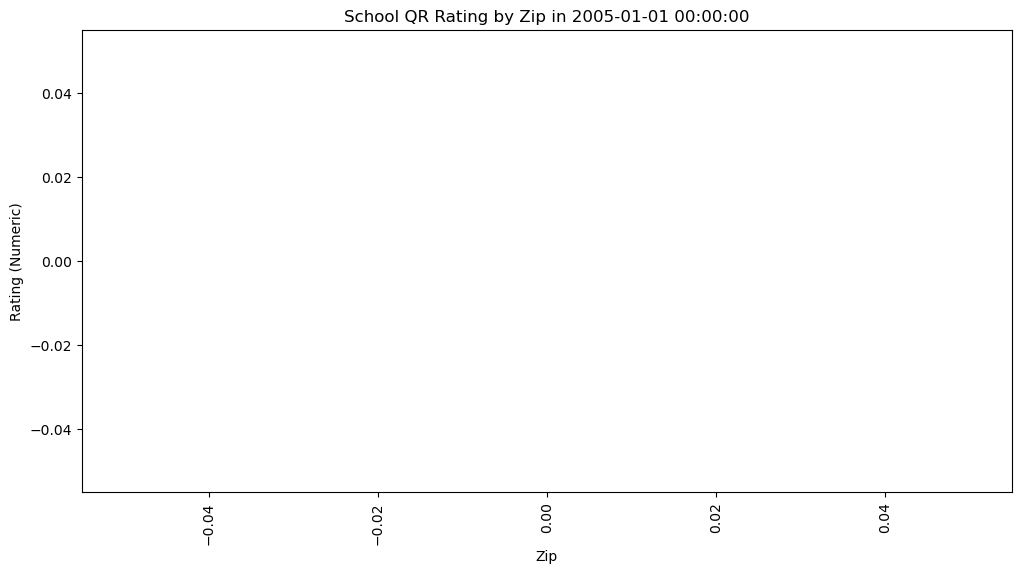

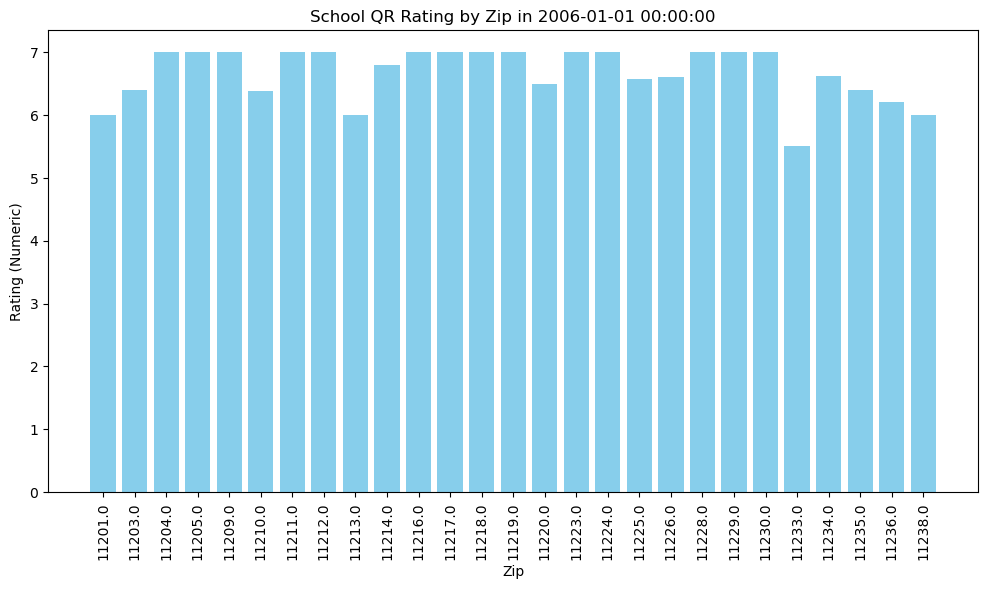

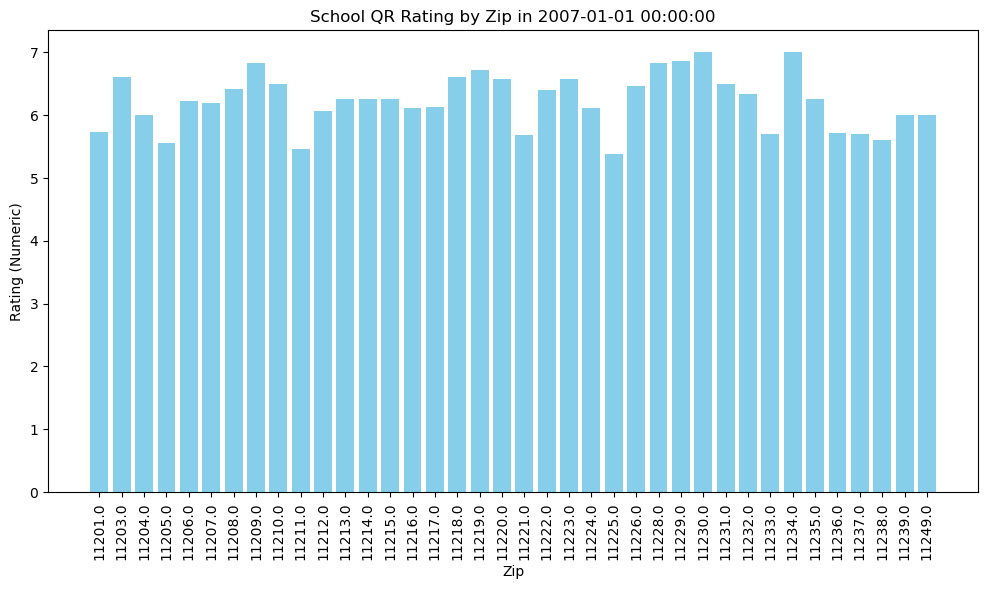

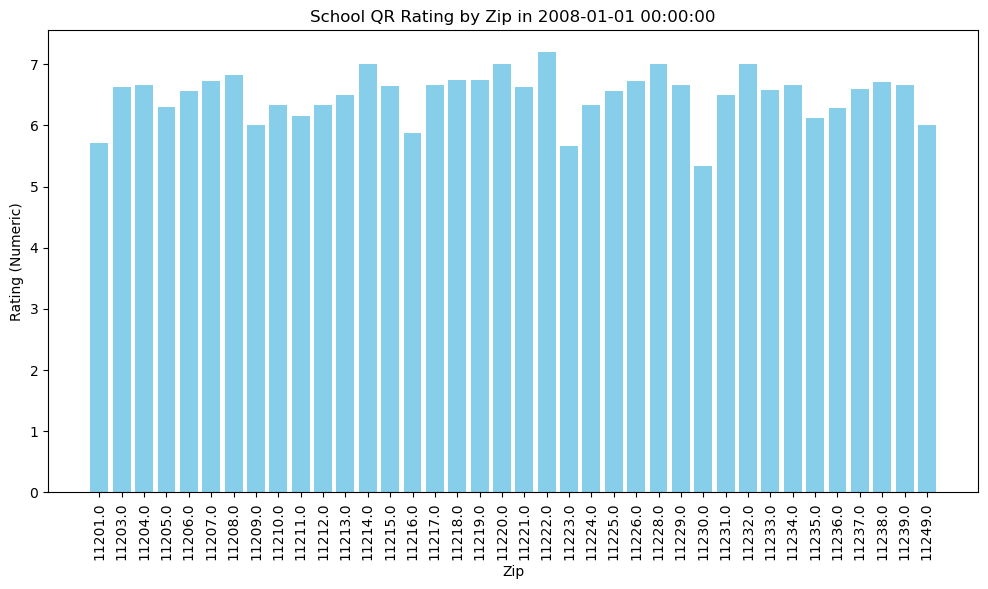

In [74]:
# a simple function for showing changes of QR ratings over time (in years)

yrs = [2005, 2006, 2007, 2008]

for yr in yrs:
    barplot_borough_schools_by_yr(K_schools_dict, school_location_df, 'Zip', yr)


In [75]:
school_location_df[school_location_df['bn'] == 'K337']['Zip']

1009    11214
Name: Zip, dtype: int64

# Data Analysis:

In [76]:
# 1,766 schools total
all_grouped.describe()

,data_pts,missing_overall_rating,first_review_date,last_review_date
count,1762.000000,1762.000000,1762,1762
mean,5.112372,1.804767,2008-03-19 03:39:01.430193152,2017-04-01 18:34:43.995459840
min,1.000000,0.000000,2006-04-05 00:00:00,2006-05-24 00:00:00
25%,4.000000,2.000000,2006-12-10 00:00:00,2016-12-08 00:00:00
50%,5.000000,2.000000,2007-03-14 12:00:00,2017-11-11 00:00:00
75%,6.000000,2.000000,2007-05-24 00:00:00,2018-11-17 00:00:00
max,12.000000,4.000000,2020-02-07 00:00:00,2020-03-14 00:00:00
std,1.926496,0.704830,NaN,NaN


In [77]:
totally_missing = all_grouped.loc[all_grouped['data_pts'] == all_grouped['missing_overall_rating']]

# 133 schools missing all of their overall_rating data
totally_missing.sample(10)

,data_pts,missing_overall_rating,first_review_date,last_review_date
bn,,,,
M933,2,2,2015-04-30,2019-11-15
Q243,2,2,2014-12-12,2017-01-14
X558,2,2,2014-12-12,2019-05-04
X351,2,2,2014-11-22,2016-10-29
Q297,2,2,2015-04-30,2020-02-01
Q360,2,2,2016-05-12,2018-02-10
X583,1,1,2019-04-14,2019-04-14
K630,2,2,2015-05-20,2016-10-22
Q258,2,2,2015-01-17,2019-01-19


In [78]:
print(results_df[results_df['overall_rating'] == 'No Data'].shape)
grouped_df = results_df[results_df['overall_rating'] == 'No Data'].groupby('bn')['overall_rating', ].count().reset_index()
print(grouped_df.shape)
grouped_df.sample(20)

(3180, 46)
(1641, 2)


,bn,overall_rating
1359,X141,2
478,K722,2
429,K617,2
1449,X284,2
1122,Q400,4
1397,X211,2
1459,X297,2
856,Q052,2
998,Q204,2
320,K423,2


In [79]:
results_df[['bn', 'start_date_converted', 'overall_rating']][results_df['bn'] == 'X381']

,bn,start_date_converted,overall_rating
3448,X381,2009-12-16,P
4164,X381,2011-03-25,D
6663,X381,2015-04-01,No Data
7664,X381,2016-12-17,No Data


In [80]:
results_df[~results_df['bn'].str.isalnum()]

,bn,school_year,start_date,overall_rating,indicator_1_1,indicator_1_2,indicator_1_3,indicator_1_4,indicator_1_5,indicator_1_6,indicator_1_7,indicatoroverall_1,indicator_2_1,indicator_2_2,indicator_2_3,indicator_2_4,indicator_2_5,indicator_2_6,indicator_2_7,indicatoroverall_2,indicator_3_1,indicator_3_2,indicator_3_3,indicator_3_4,indicator_3_5,indicator_3_6,indicator_3_7,indicator_3_8,indicatoroverall_3,indicator_4_1,indicator_4_2,indicator_4_3,indicator_4_4,indicator_4_5,indicator_4_6,indicator_4_7,indicatoroverall_4,indicator_5_1,indicator_5_2,indicator_5_3,indicator_5_4,indicator_5_5,indicator_5_6,indicator_5_7,indicatoroverall_5,start_date_converted


In [81]:
results_df['overall_rating'].unique()

array(['P', 'WD', 'U', 'DYO', 'UPF', 'O', 'D', 'UD', 'No Data'],
      dtype=object)

In [82]:
results_df.head()

,bn,school_year,start_date,overall_rating,indicator_1_1,indicator_1_2,indicator_1_3,indicator_1_4,indicator_1_5,indicator_1_6,indicator_1_7,indicatoroverall_1,indicator_2_1,indicator_2_2,indicator_2_3,indicator_2_4,indicator_2_5,indicator_2_6,indicator_2_7,indicatoroverall_2,indicator_3_1,indicator_3_2,indicator_3_3,indicator_3_4,indicator_3_5,indicator_3_6,indicator_3_7,indicator_3_8,indicatoroverall_3,indicator_4_1,indicator_4_2,indicator_4_3,indicator_4_4,indicator_4_5,indicator_4_6,indicator_4_7,indicatoroverall_4,indicator_5_1,indicator_5_2,indicator_5_3,indicator_5_4,indicator_5_5,indicator_5_6,indicator_5_7,indicatoroverall_5,start_date_converted
0,M307,2005-06,38810.0,P,P,P,P,P,No Data,No Data,No Data,P,WD,WD,WD,WD,WD,No Data,No Data,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,P,P,P,P,No Data,No Data,No Data,P,2006-04-05
1,M459,2005-06,38810.0,P,P,P,P,P,No Data,No Data,No Data,P,P,P,P,P,P,No Data,No Data,P,WD,WD,WD,WD,WD,WD,WD,WD,WD,P,P,P,P,P,P,P,P,P,P,P,P,No Data,No Data,No Data,P,2006-04-05
2,M560,2005-06,38810.0,WD,WD,WD,WD,WD,No Data,No Data,No Data,WD,WD,WD,WD,WD,WD,No Data,No Data,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,No Data,No Data,No Data,WD,2006-04-05
4,M294,2005-06,38812.0,WD,WD,WD,WD,WD,No Data,No Data,No Data,WD,WD,WD,WD,WD,WD,No Data,No Data,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,P,P,P,P,No Data,No Data,No Data,P,2006-04-07
5,M299,2005-06,38812.0,P,P,P,P,P,No Data,No Data,No Data,P,P,P,P,P,P,No Data,No Data,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,No Data,No Data,No Data,P,2006-04-07


# Handling Missing Location Data:

### Step 1: Merging the borough dataframes to the location data.

In [112]:
# Creating dataframes for all boroughs
K_df = convert_borough_dict_to_df(K_schools_dict)
M_df = convert_borough_dict_to_df(M_schools_dict)
Q_df = convert_borough_dict_to_df(Q_schools_dict)
R_df = convert_borough_dict_to_df(R_schools_dict)
X_df = convert_borough_dict_to_df(X_schools_dict)

In [113]:
K_df.head()

,School Code,QR Score,Assessment Time
0,K544,6,2006-04-12
1,K544,6,2007-04-28
2,K544,7,2008-03-15
3,K544,6,2010-02-10
4,K544,0,2014-12-03


In [114]:
# inner-join of results_df and school_location_df

merged_K_df = pd.merge(K_df, school_location_df, on='School Code', how='left')
merged_K_df.head(30)

,School Code,QR Score,Assessment Time,Location Name,Primary Address,City,Zip,Census Tract,Community District
0,K544,6,2006-04-12,NaN,NaN,NaN,<NA>,<NA>,<NA>
1,K544,6,2007-04-28,NaN,NaN,NaN,<NA>,<NA>,<NA>
2,K544,7,2008-03-15,NaN,NaN,NaN,<NA>,<NA>,<NA>
3,K544,6,2010-02-10,NaN,NaN,NaN,<NA>,<NA>,<NA>
4,K544,0,2014-12-03,NaN,NaN,NaN,<NA>,<NA>,<NA>
5,K337,6,2006-04-26,International High School at Lafayette,2630 BENSON AVENUE,BROOKLYN,11214,30600,313
6,K337,1,2007-05-23,International High School at Lafayette,2630 BENSON AVENUE,BROOKLYN,11214,30600,313
7,K337,7,2008-05-15,International High School at Lafayette,2630 BENSON AVENUE,BROOKLYN,11214,30600,313
8,K337,7,2009-05-02,International High School at Lafayette,2630 BENSON AVENUE,BROOKLYN,11214,30600,313
9,K337,5,2012-03-28,International High School at Lafayette,2630 BENSON AVENUE,BROOKLYN,11214,30600,313


In [115]:
# function to make left joins on all borough data:

def map_boroughs_to_loc(borough_df, location_df):
    '''
    Input:
        A borough dataframe and location dataframe, with a shared 'School Code' identifier.
    
    Output:
        A single, merged dataframe, keeping all boroughs, regardnless of missing location data.
    
    '''
    merged_df = pd.merge(borough_df, location_df, on='School Code', how='left')
    return merged_df


In [116]:
K_df = map_boroughs_to_loc(K_df, school_location_df)
M_df = map_boroughs_to_loc(M_df, school_location_df)
Q_df = map_boroughs_to_loc(Q_df, school_location_df)
R_df = map_boroughs_to_loc(R_df, school_location_df)
X_df = map_boroughs_to_loc(X_df, school_location_df)

In [104]:
X_df

,School Code,QR Score,Assessment Time,Location Name,Primary Address,City,Zip,Census Tract,Community District
0,X231,6,2006-04-28,Eagle Academy for Young Men,4143 Third Avenue,Bronx,10457,39500,206
1,X231,6,2007-11-28,Eagle Academy for Young Men,4143 Third Avenue,Bronx,10457,39500,206
2,X231,6,2009-04-29,Eagle Academy for Young Men,4143 Third Avenue,Bronx,10457,39500,206
3,X231,6,2012-03-28,Eagle Academy for Young Men,4143 Third Avenue,Bronx,10457,39500,206
4,X231,0,2015-05-17,Eagle Academy for Young Men,4143 Third Avenue,Bronx,10457,39500,206
5,X231,0,2017-06-02,Eagle Academy for Young Men,4143 Third Avenue,Bronx,10457,39500,206
6,X269,4,2006-04-28,Bronx Studio School for Writers and Artists,928 Simpson Street,Bronx,10459,8900,202
7,X269,7,2007-05-09,Bronx Studio School for Writers and Artists,928 Simpson Street,Bronx,10459,8900,202
8,X269,7,2008-05-23,Bronx Studio School for Writers and Artists,928 Simpson Street,Bronx,10459,8900,202
9,X269,5,2011-10-20,Bronx Studio School for Writers and Artists,928 Simpson Street,Bronx,10459,8900,202


# Exporting Cleaned Data:

In [84]:
# turning results_df into a new .csv file with cleaned data
results_df.to_csv('cleaned_data/QualityReviewRatings_Cleaned.csv', index=False)

In [86]:
K_df.to_csv('cleaned_data/Brooklyn_yearly_ratings.csv')
M_df.to_csv('cleaned_data/Manhattan_yearly_ratings.csv')
Q_df.to_csv('cleaned_data/Queens_yearly_ratings.csv')
R_df.to_csv('cleaned_data/SI_yearly_ratings.csv')
X_df.to_csv('cleaned_data/Bronx_yearly_ratings.csv')